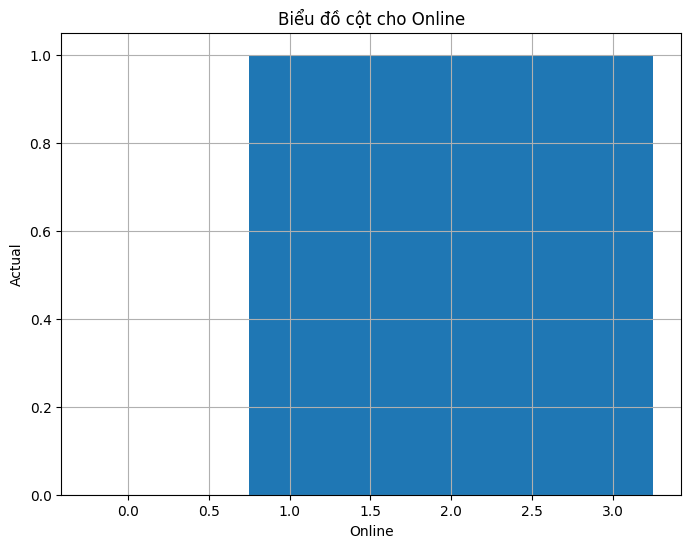

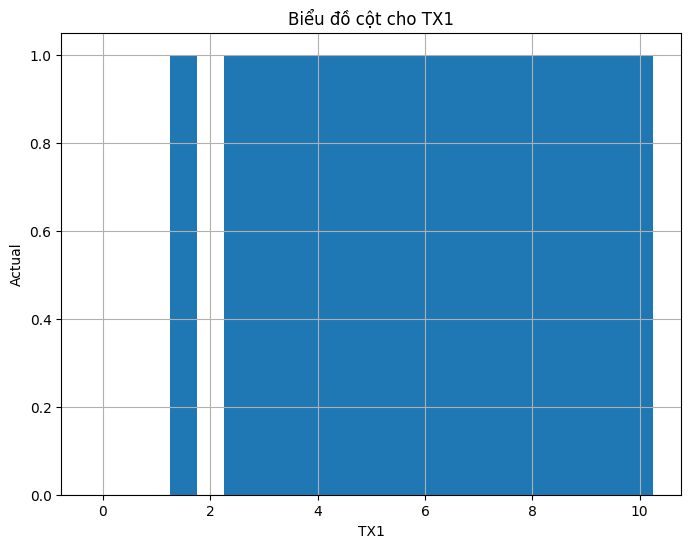

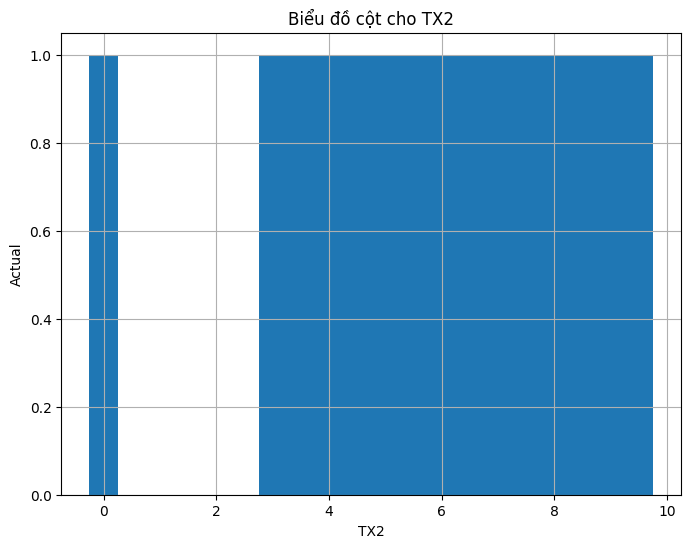

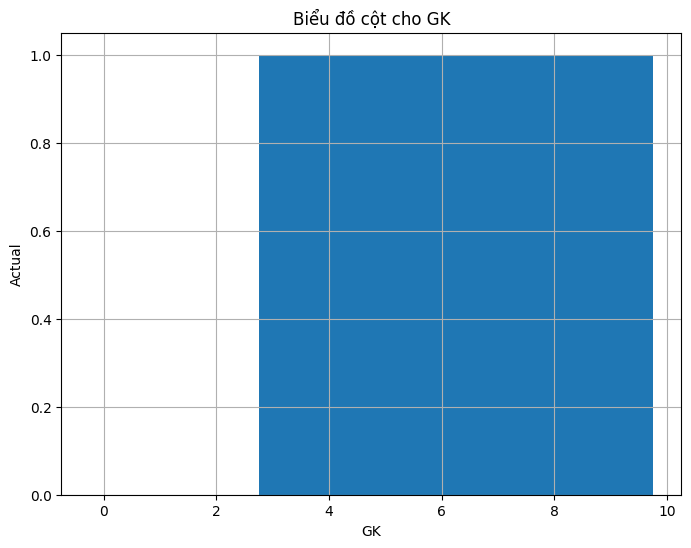

Bias:  -0.5732956010219467
Trọng số cho 'Online': 0.30591456754117957
Trọng số cho 'TX1': 0.045142280415899544
Trọng số cho 'TX2': 0.04276209257223816
Trọng số cho 'GK': 0.05098300248103272


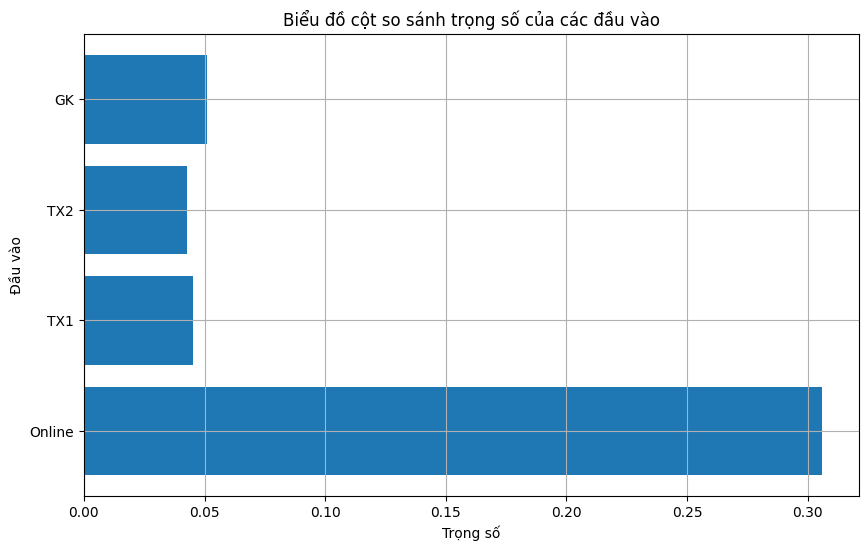

Giá trị lỗi: 0.15900323606038838
Giá trị dự đoán: 0.76, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.23, Giá trị thực tế: 0.00
Giá trị dự đoán: 1.21, Giá trị thực tế: 1.00
Giá trị dự đoán: 1.17, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.21, Giá trị thực tế: 0.00
Giá trị dự đoán: 1.17, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.57, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.93, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.99, Giá trị thực tế: 1.00
Giá trị dự đoán: 1.09, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.73, Giá trị thực tế: 1.00
Giá trị dự đoán: 1.10, Giá trị thực tế: 1.00
Giá trị dự đoán: 1.06, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.79, Giá trị thực tế: 1.00
Giá trị dự đoán: 1.00, Giá trị thực tế: 1.00
Giá trị dự đoán: 1.10, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.22, Giá trị thực tế: 0.00
Giá trị dự đoán: 0.88, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.18, Giá trị thực tế: 0.00
Giá trị dự đoán: 0.16, Giá trị thực tế: 0.00
Giá trị dự đoán: 0.91, Giá trị thực tế: 1.00
Giá trị dự đoán: 0.07,

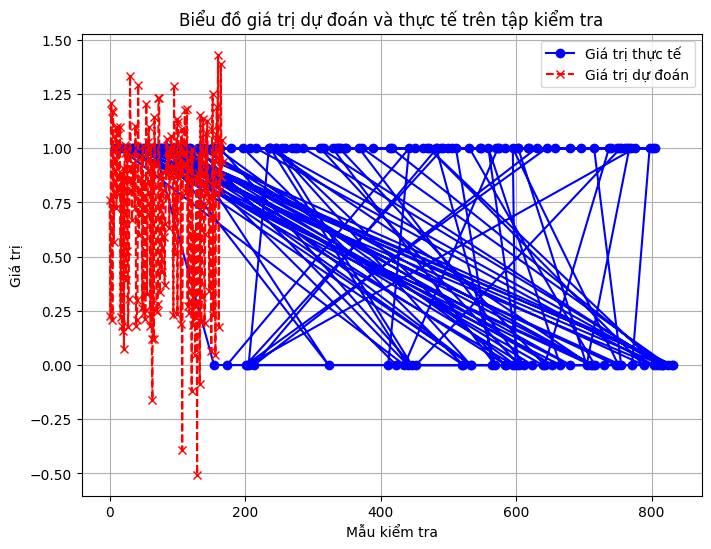

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Đọc dữ liệu tệp csv
data = pd.read_csv('data_TA1.csv', encoding='utf-8')

# Chọn các cột đầu vào và cột đầu ra
input_cols = ['Online', 'TX1', 'TX2', 'GK']
output_col = 'Actual'
X = data.loc[:, input_cols]
y = data.loc[:, output_col]

# Vẽ đồ thị cột thể hiện sự tương quan của đầu vào với đầu ra
selected_data = data[input_cols + [output_col]]
for col in input_cols:
    plt.figure(figsize=(8, 6))
    plt.bar(selected_data[col], selected_data[output_col], width=0.5, align='center')
    plt.xlabel(col)
    plt.ylabel('Actual')
    plt.title(f'Biểu đồ cột cho {col}')
    plt.grid(True)
    plt.show()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20%test 80%train

# Lưu file test ra ngoài
test_data = pd.DataFrame({'Online': X_test['Online'], 'TX1': X_test['TX1'], 'TX2': X_test['TX2'], 'GK': X_test['GK'], 'Actual': y_test})
test_data.to_csv('test_data.csv', index=False, encoding='utf-8')

# Huấn luyện mô hình Logistic Regression trên tập huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

#Trọng số weght và bias
bias = model.intercept_
print("Bias: ", bias)
weight = model.coef_
for x, w in zip(input_cols, weight):
  print(f"Trọng số cho '{x}': {w}")

# Biểu đồ thể hiện trọng số của các đầu vào
plt.figure(figsize=(10, 6))
plt.barh(input_cols, weight)
plt.xlabel('Trọng số')
plt.ylabel('Đầu vào')
plt.title('Biểu đồ cột so sánh trọng số của các đầu vào')
plt.grid(True)
plt.show()

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
error = log_loss(y_test, y_pred)
print('Giá trị lỗi:', error)

# In giá trị dự đoán và giá trị thực để so sánh
for pred, actual in zip(y_pred, y_test):
    print("Giá trị dự đoán: {:.2f}, Giá trị thực tế: {:.2f}".format(pred, actual))

# Quá trình test sau khi huấn luyện
print("Kết quả dự đoán của tệp test")
y_pred_test = model.predict(X_test)
for pred, truth in zip(y_pred_test, y_test):
    print("Giá trị dự đoán: ", pred, " ", truth)

# Biểu đồ so sánh giữa giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Giá trị thực tế', color='blue', marker='o')
plt.plot(y_pred_test, label='Giá trị dự đoán', color='red', linestyle='dashed', marker='x')
plt.xlabel('Mẫu kiểm tra')
plt.ylabel('Giá trị')
plt.title('Biểu đồ giá trị dự đoán và thực tế trên tập kiểm tra')
plt.legend()
plt.grid(True)
plt.show()